In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [120]:
column_names = []
with open('/content/drive/MyDrive/JPMC Assessment/census-bureau.columns', 'r') as f:
    for line in f:
        column_names.append(line.strip().replace(" ","_"))

file = pd.read_csv("/content/drive/MyDrive/JPMC Assessment/census-bureau.data", delimiter=",")
file.columns = column_names

In [121]:
file.columns

Index(['age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'education', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'tax_filer_stat',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'weight',
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'ow

In [122]:
rename_dict = {
    "fill_inc_questionnaire_for_veteran's_admin": "fill_inc_questionnaire_for_veterans_admin",
    'migration_code-change_in_msa': 'migration_code_change_in_msa',
    'migration_code-change_in_reg': 'migration_code_change_in_reg',
    'migration_code-move_within_reg': 'migration_code_move_within_reg'
}
file.rename(columns=rename_dict, inplace=True)

In [123]:
file['hispanic_origin'] = file['hispanic_origin'].fillna('Do not know') #filling the missing values in this column by Do not know
file.isnull().sum()

,0
age,0
class_of_worker,0
detailed_industry_recode,0
detailed_occupation_recode,0
education,0
wage_per_hour,0
enroll_in_edu_inst_last_wk,0
marital_stat,0
major_industry_code,0
major_occupation_code,0


In [125]:
file.eq('Not in universe').sum().sort_values(ascending=False)

,0
fill_inc_questionnaire_for_veterans_admin,197538
reason_for_unemployment,193452
enroll_in_edu_inst_last_wk,186942
region_of_previous_residence,183749
state_of_previous_residence,183749
member_of_a_labor_union,180458
family_members_under_18,144231
major_occupation_code,100683
class_of_worker,100244
migration_prev_res_in_sunbelt,84054


### Not in Universe
Most of the columns contain "Not in Universe", which I am assuming as an important factor in Census dataset. This will be a strong indicator to consider while predicting. For example: Reason for unemployment, this will only apply to the who are unemployed, and others such as employed people, students, children will get a Not in Universe. This will be used even in Segmentation to segment the group of people.

Fill inc questionnaire will only apply to Veterans, other than veterans will be Not in Universe, important to get the information about Veteral status

These values are reasonable and important as most people are not veterans, unemployed, etc. Keeping these features as is and not dropping them.


# Explore Income and Wage Related Features

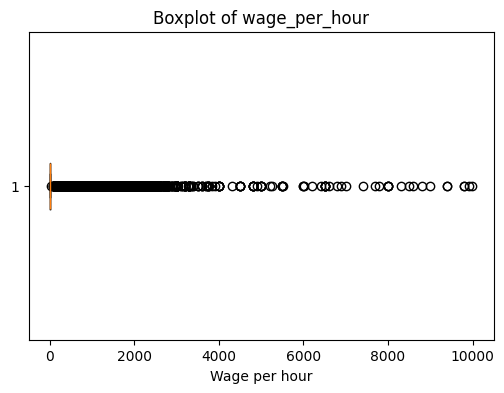

Zero wage count: 188218
Total rows: 199522
Percentage of zero wages: 94.33%
wage_category
Zero Wage    188218
High Wage     11304
Name: count, dtype: int64
weeks_worked_in_year
0     95982
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
36     1108
16      945
32      883
44      845
51      819
24      767
4       757
46      708
35      704
10      694
45      669
6       646
39      602
42      573
28      568
49      509
13      496
1       464
2       458
25      457
3       417
38      380
43      374
22      370
15      353
17      331
5       309
47      278
18      272
14      257
9       239
34      230
7       152
21      135
37      123
41       88
33       81
11       78
27       76
23       67
29       63
31       51
19       48
Name: count, dtype: int64


In [127]:
# Box Plot
plt.figure(figsize=(6,4))
plt.boxplot(file['wage_per_hour'], vert=False)
plt.title("Boxplot of wage_per_hour")
plt.xlabel("Wage per hour")
plt.show()

# distribution of zero values
zero_count = (file['wage_per_hour'] == 0).sum()
total_count = len(file)
zero_percentage = zero_count / total_count * 100

print("Zero wage count:", zero_count)
print("Total rows:", total_count)
print(f"Percentage of zero wages: {zero_percentage:.2f}%")

# Binning
def wage_category(x):
    if x == 0:
        return 'Zero Wage'
    elif x <= file['wage_per_hour'].median():
        return 'Low Wage'
    else:
        return 'High Wage'

file['wage_category'] = file['wage_per_hour'].apply(wage_category)

# Value counts
print(file['wage_category'].value_counts())
print(file['weeks_worked_in_year'].value_counts())

num_persons_worked_for_employer
0    95982
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: count, dtype: int64


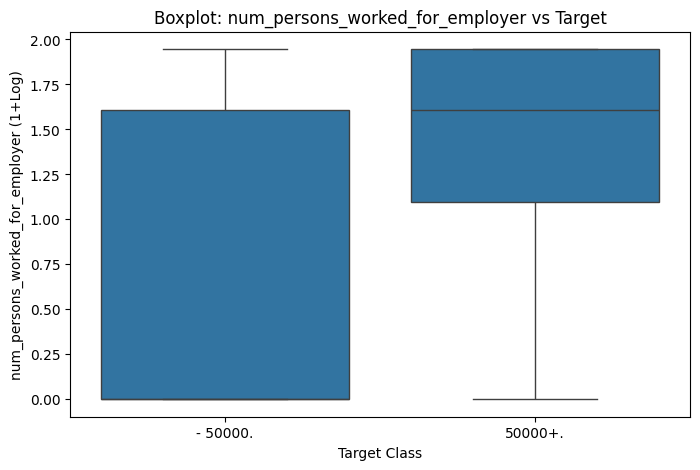

In [128]:
# Value counts
print(file['num_persons_worked_for_employer'].value_counts())

# Apply log(1 + x) to fit the scale
file['num_persons_worked_for_employer_log'] = np.log1p(
    file['num_persons_worked_for_employer']
)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x=file['label'],
    y=file['num_persons_worked_for_employer_log']
)
plt.title("Boxplot: num_persons_worked_for_employer vs Target")
plt.xlabel("Target Class")
plt.ylabel("num_persons_worked_for_employer (1+Log)")
plt.show()


### Features with More unique values

In [130]:
cols_with_more_features = [
    'detailed_occupation_recode', # Keep as is
    'detailed_industry_recode', # Keep as is
    'major_industry_code', # OHE or OrdinalEnc
    'major_occupation_code', # OHE or OrdinalEnc
    'country_of_birth_father', #OHE or OrdinalEnc-  Can regroup regionwise but keeping as is
    'country_of_birth_mother', #OHE or OrdinalEnc-  Can regroup regionwise but keeping as is
    'country_of_birth_self', #OHE or OrdinalEnc-  Can regroup regionwise but keeping as is
    'sex', #OHE
    'race', #OHE
    'marital_stat', #OHE
    'education', #OHE or OrdinalEnc
    'tax_filer_stat', #OHE
    'region_of_previous_residence', # OHE
    'state_of_previous_residence', # Ordinal
    'migration_code_change_in_msa', # OHE
    'migration_code_change_in_reg', # OHE
    'migration_code_move_within_reg', #OHE
    'live_in_this_house_1_year_ago', #OHE
    'migration_prev_res_in_sunbelt', #OHE
    'age', # N Keep as is
    'class_of_worker', # C OHE
    'enroll_in_edu_inst_last_wk', # C OHE
    'hispanic_origin', # C OHE
    'member_of_a_labor_union', # C OHE
    'reason_for_unemployment', # C OHE
    'full_or_part_time_employment_stat', # C OHE
    'detailed_household_and_family_stat', # C OHE Or ordinal
    'detailed_household_summary_in_household', # C OHE
    'family_members_under_18', # C OHE
    'citizenship', # C OHE
    'own_business_or_self_employed', # C OHE
    "fill_inc_questionnaire_for_veterans_admin", # C OHE
    "veterans_benefits", #N Keep as is
    "year"# N Keep as is
]

for col in cols_with_more_features:
    print(f"Column: {col}")
    print("  Unique values:", file[col].nunique())
    print("  Dtype:", file[col].dtype)
    print("\n")

Column: detailed_occupation_recode
  Unique values: 47
  Dtype: int64


Column: detailed_industry_recode
  Unique values: 52
  Dtype: int64


Column: major_industry_code
  Unique values: 24
  Dtype: object


Column: major_occupation_code
  Unique values: 15
  Dtype: object


Column: country_of_birth_father
  Unique values: 43
  Dtype: object


Column: country_of_birth_mother
  Unique values: 43
  Dtype: object


Column: country_of_birth_self
  Unique values: 43
  Dtype: object


Column: sex
  Unique values: 2
  Dtype: object


Column: race
  Unique values: 5
  Dtype: object


Column: marital_stat
  Unique values: 7
  Dtype: object


Column: education
  Unique values: 17
  Dtype: object


Column: tax_filer_stat
  Unique values: 6
  Dtype: object


Column: region_of_previous_residence
  Unique values: 6
  Dtype: object


Column: state_of_previous_residence
  Unique values: 51
  Dtype: object


Column: migration_code_change_in_msa
  Unique values: 10
  Dtype: object


Column: migration_co

# QUick Correlation Check

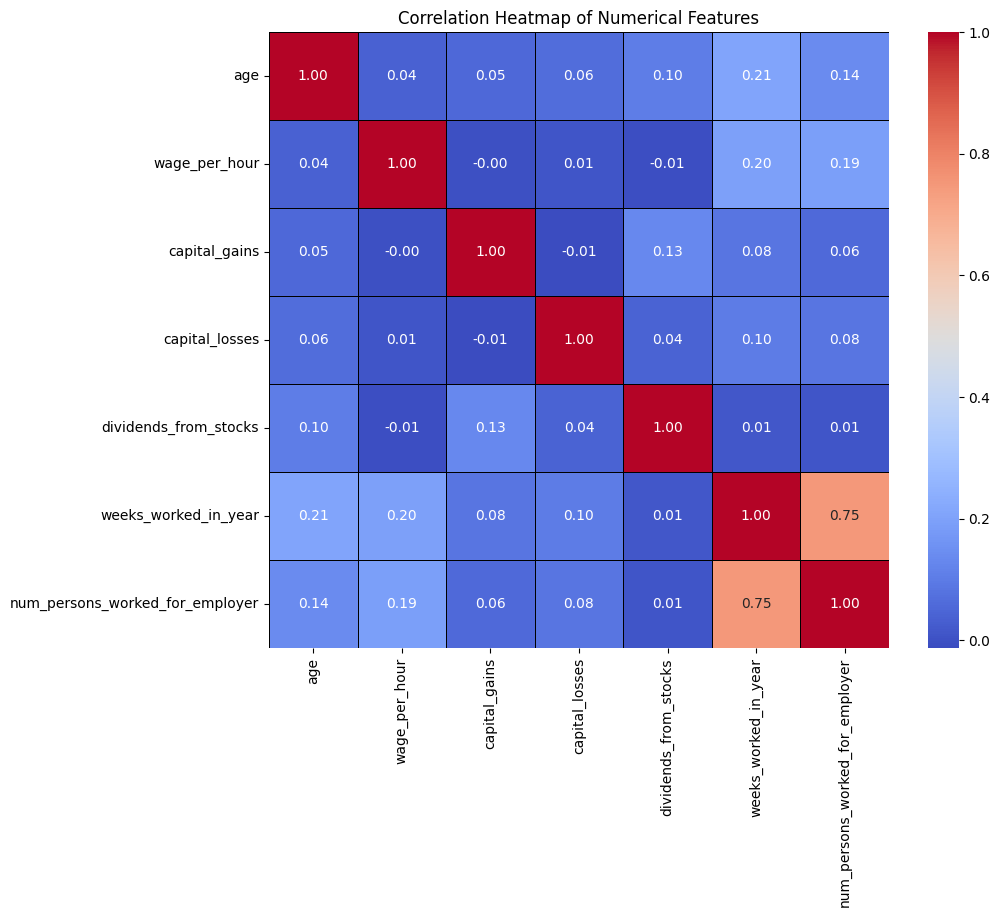

In [131]:
# Get Numerical Columns
numerical_cols = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses',
                  'dividends_from_stocks', 'weeks_worked_in_year',
                  'num_persons_worked_for_employer']
corr_df = file[numerical_cols]

# correlation matrix
correlation_matrix = corr_df.corr()

# Heapmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# If any two features are highly correlated, we can drop them but in this case it is not necessary

# Quick Check for Feature Importance with RandomForests

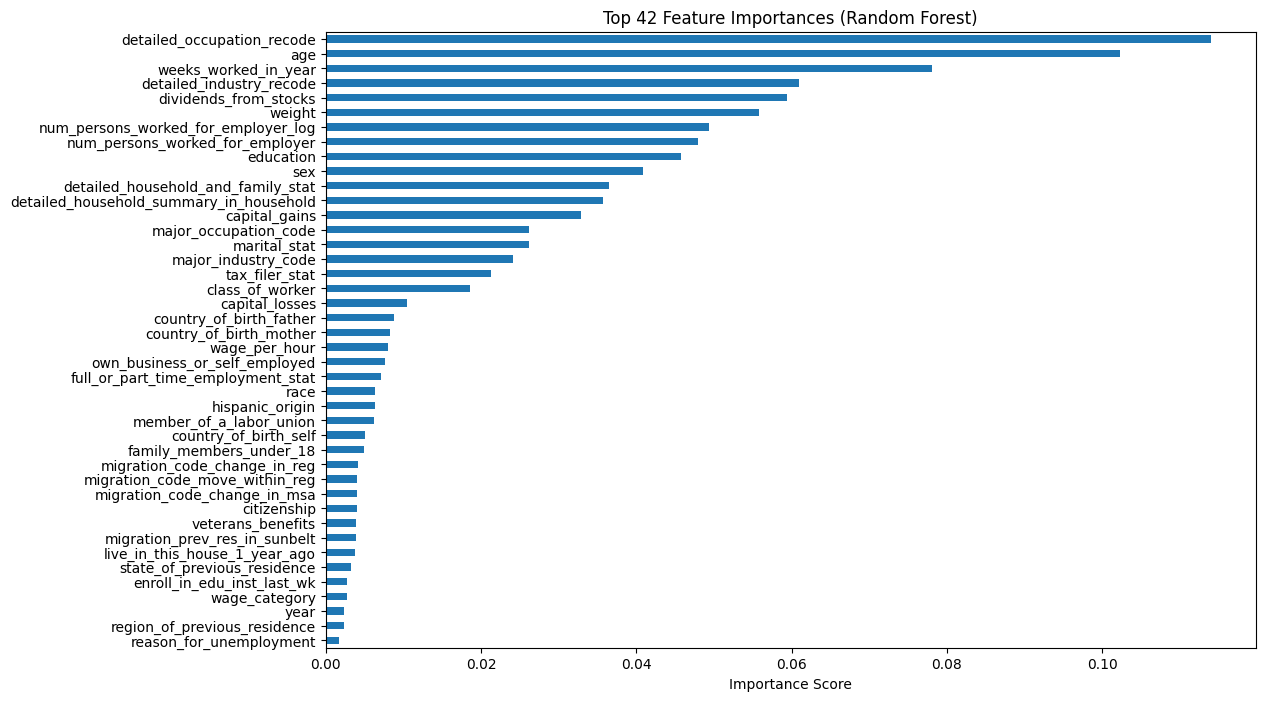

In [132]:
### WITHOUT SMOTE ###
df = file.copy()

# Encode
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Divide in Xm y
X = df.drop('label', axis=1)
y = df['label']

# Simple Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X, y)

# RF Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)

# Plot
top_n = 42
plt.figure(figsize=(12, 8))
sorted_importances[:top_n].plot(kind='barh')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


Original training shape:  (139665, 43)
Original class distribution:
 label
0    130998
1      8667
Name: count, dtype: int64

After SMOTE:
Resampled shape: (261996, 43)
Resampled class distribution:
 label
1    130998
0    130998
Name: count, dtype: int64


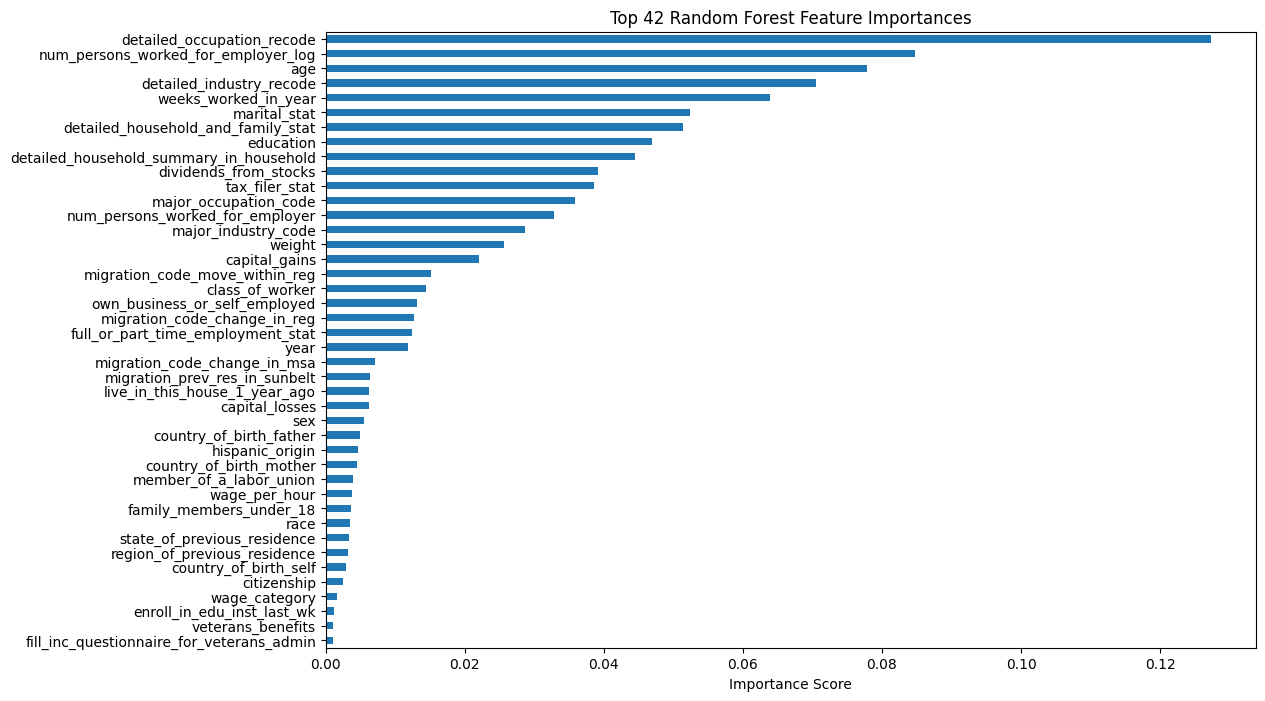

In [133]:
### WITH SMOTE ###

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Divide in Xm y and train test split
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Original training shape: ", X_train.shape)
print("Original class distribution:\n", y_train.value_counts())

# SMOTE and resample
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Resampled shape:", X_train_resampled.shape)
print("Resampled class distribution:\n", y_train_resampled.value_counts())

# Simple Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # optional when using SMOTE
    n_jobs=-1
)

rf.fit(X_train_resampled, y_train_resampled)

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances = importances.sort_values(ascending=False)

# Plot
top_n = 42
plt.figure(figsize=(12, 8))
sorted_importances[:top_n].plot(kind='barh')
plt.title(f"Top {top_n} Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# wage_per_hour 						                  N 		        Keep as is
# weeks_worked_in_year					              N			        Keep as is
# num_persons_worked_for_employer				      N			        Keep as is
# detailed_occupation_recode 				          N 			      Keep as is
# detailed_industry_recode 				            N 			      Keep as is
# major_industry_code 					              C 			      OHE or OrdinalEnc
# major_occupation_code 					            C 			      OHE or OrdinalEnc
# country_of_birth_father 				            C 			      OHE or OrdinalEnc-  Can regroup regionwise but keeping as is
# country_of_birth_mother 				            C 			      OHE or OrdinalEnc-  Can regroup regionwise but keeping as is
# country_of_birth_self'					            C 			      OHE r OrdinalEnc-  Can regroup regionwise but keeping as is
# sex 							                          C 			      OHE
# race 							                          C  			      OHE
# marital_stat 						                    C 			      OHE
# education 						                      C 			      OHE or OrdinalEnc
# tax_filer_stat 						                  C 			      OHE
# region_of_previous_residence 				        C 			      OHE
# state_of_previous_residence 				        C			        Ordinal
# migration_code-change_in_msa 				        C 			      OHE
# migration_code-change_in_reg 				        C 			      OHE
# migration_code-move_within_reg 				      C 			      OHE
# live_in_this_house_1_year_ago 				      C 			      OHE
# migration_prev_res_in_sunbelt 				      C 			      OHE
# capital_gains						                    N			        Combine
# dividends_from_stocks					              N			        Combine
# capital_losses						                  N			        Combine
# weight							                        N			        Modeling
# age							                            N			        Keep as is
# class_of_worker						                  C			        OHE
# enroll_in_edu_inst_last_wk				          C 			      OHE
# hispanic_origin						                  C			        OHE
# member_of_a_labor_union					            C			        OHE
# reason_for_unemployment					            C 			      OHE
# full_or_part_time_employment_stat			      C 			      OHE
# detailed_household_and_family_stat			    C 			      OHE ordinal
# detailed_household_summary_in_household			C 			      OHE
# family_members_under_18					            C 			      OHE
# citizenship				 		                      C			        OHE
# own_business_or_self_employed				        C 			      OHE
# fill_inc_questionnaire_for_veteran's_admin	C 			      OHE
# veterans_benefits 					                N			        Keep as is
# year		 					                          N			        Map to 1 & 0

### Based on the Above EDA, in the data preprocessing steps
- Drop some of the features that appear at bottom in RFC Feature importance
- Encode: For simplicity, encode all Categorical variables with OHE
- Keep numerical as is, use scaling if needed
- Combine: capital_gains + dividends_from_stocls - capital_losses
- Map Label {0:-50000, 1:+50000}

Modeling Steps
- Use Weight column while fitting the models in the loss function
- Use SMOTE before train test split only on the training data